# First version authentic/ bootleg plush identifier

I first import all the neccesary libraries to make my project work. Since Jeremy Howard's Is it a bird? AI model tutorial uses the fastai library, I will be using that

In [1]:
from fastcore.all import *
import torch
from fastai.vision.all import *
import fastai
import torchvision.models as models
from fastdownload import download_url

Since running the script causes warnings to pop up about deprecated code, I decided to hide those as the warnings take alot of space in the output log

In [2]:
import warnings
warnings.filterwarnings("ignore")

I specify the path to the folder I want the model to train on, in this case is the folder "determine_real_or_fake" with images of authentic and bootleg plushies.

Afterwards, I create a DataLoader that contains a training (for training the model) and validation set (to check the model's accuracy). To preview the model's capabilities, a DataBlock is also created with several parameters:
- Inputs the images as categories (which are the character's names)
- Gets all the images in the folders
- Splits the data in training and validation sets randomly, with 20% of the data being used for the latter
- Get the name of the folders that the images are in
- Resize the images in 224x224 px by squishing it

Lastly, a DataBlock with 6 images is created with the labels above it

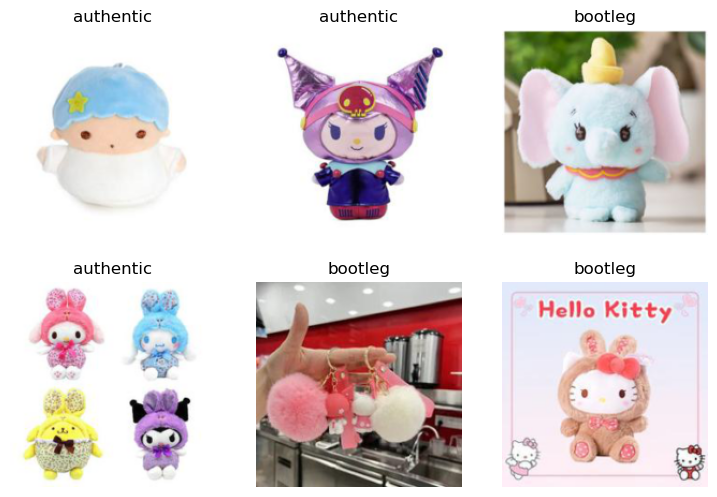

In [3]:
path = Path('real_or_fake')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

To train the model, I use ResNet50 which is a widely used vision model. 
Finally, the trained model is finetuned using fastai's method fine_tune() which applies the best pracitices for it. I specify the amount of finetuning at 3, as one session typically takes around 6 minutes.

In [4]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(3)
#finetuning before removing backgrounds

epoch,train_loss,valid_loss,accuracy,time
0,0.947623,0.802525,0.786885,09:21


epoch,train_loss,valid_loss,accuracy,time
0,0.419646,0.671442,0.831967,12:42
1,0.315599,0.497844,0.893443,06:11
2,0.221518,0.498504,0.868852,06:30


Finally, the authenticity of the plush is calculated and outputted along with the probability rate of the outcome being correct

In [1]:
is_authentic,_,probs = learn.predict(PILImage.create('test images/melo.png'))
print(f"This is a: {is_authentic}.")
print(f"Probability: {probs[0]:.4f}")

NameError: name 'learn' is not defined